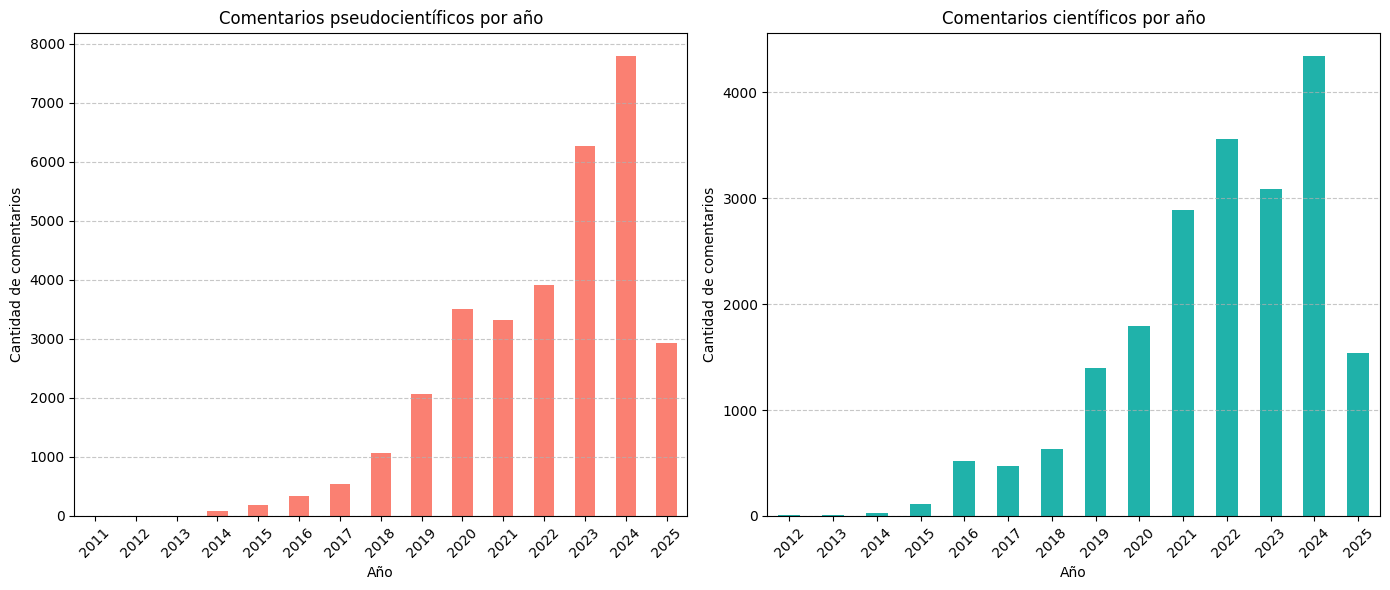

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar la figura con dos subplots
plt.figure(figsize=(14, 6))

# ==============================================
# Primer subplot - Datos pseudocientíficos
# ==============================================
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot

# Cargar y procesar datos pseudocientíficos
df1 = pd.read_csv("Evaluated final datasets/Evaluated_pseudo_1.csv")
df2 = pd.read_csv("Evaluated final datasets/Evaluated_pseudo_2.csv")
combined_pseudo = pd.concat([df1, df2], ignore_index=True)
combined_pseudo['timestamp'] = pd.to_datetime(combined_pseudo['timestamp'])

# Renombrar última columna
ultima_columna = combined_pseudo.columns[-1]
combined_pseudo = combined_pseudo.rename(columns={ultima_columna: 'Tematica del comentario'})

# Extraer año y contar
combined_pseudo['año'] = combined_pseudo['timestamp'].dt.year
conteo_pseudo = combined_pseudo['año'].value_counts().sort_index()

# Graficar
conteo_pseudo.plot(kind='bar', color='salmon')
plt.xlabel('Año')
plt.ylabel('Cantidad de comentarios')
plt.title('Comentarios pseudocientíficos por año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ==============================================
# Segundo subplot - Datos científicos
# ==============================================
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot

# Cargar y procesar datos científicos
combined_sci = pd.read_csv("Evaluated final datasets/Evaluated_scientific.csv")
combined_sci = combined_sci.iloc[:, 1:]
combined_sci['timestamp'] = pd.to_datetime(combined_sci['timestamp'])

# Extraer año y contar
combined_sci['año'] = combined_sci['timestamp'].dt.year
conteo_sci = combined_sci['año'].value_counts().sort_index()

# Graficar
conteo_sci.plot(kind='bar', color='lightseagreen')
plt.xlabel('Año')
plt.ylabel('Cantidad de comentarios')
plt.title('Comentarios científicos por año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout y guardar
plt.tight_layout()
plt.savefig("comparacion_comentarios_por_año.png")
plt.show()

In [3]:
import pandas as pd

# Cargar datasets pseudocientíficos
df_pseudo1 = pd.read_csv("Evaluated final datasets/Evaluated_pseudo_1.csv")
df_pseudo2 = pd.read_csv("Evaluated final datasets/Evaluated_pseudo_2.csv")
combined_pseudo = pd.concat([df_pseudo1, df_pseudo2], ignore_index=True)

# Añadir columna de tipo
combined_pseudo['tipo_comentario'] = 'pseudocientifico'

# Cargar dataset científico
combined_sci = pd.read_csv("Evaluated final datasets/Evaluated_scientific.csv")
combined_sci = combined_sci.iloc[:, 1:]  # Eliminar primera columna si es un índice
combined_sci['tipo_comentario'] = 'cientifico'

# Renombrar última columna para consistencia (asumiendo que es la misma en ambos)
ultima_columna_pseudo = combined_pseudo.columns[-2]  # -2 porque la última es la nueva columna
ultima_columna_sci = combined_sci.columns[-2]

combined_pseudo = combined_pseudo.rename(columns={ultima_columna_pseudo: 'Tematica'})
combined_sci = combined_sci.rename(columns={ultima_columna_sci: 'Tematica'})

# Combinar ambos datasets
df_completo = pd.concat([combined_pseudo, combined_sci], ignore_index=True)

# Convertir timestamp a datetime
df_completo['timestamp'] = pd.to_datetime(df_completo['timestamp'])

# Verificar el resultado
print(df_completo.head())
print("\nDistribución de tipos:")
print(df_completo['tipo_comentario'].value_counts())

                                          comment_id  \
0                         UgzK88VxqOahF-KXy_F4AaABAg   
1  UgzK88VxqOahF-KXy_F4AaABAg.AAS-K363r0VACMFCjvCJmj   
2                         UgzeXJPQ5cfLPoIN6Hx4AaABAg   
3  UgzeXJPQ5cfLPoIN6Hx4AaABAg.A9-gDRxdN26AAh2_miD7_y   
4                         UgyrkE3Wihi_ZBDQGgV4AaABAg   

                                             comment  \
0  Please never ever get a needle into your intes...   
1  They ain&#39;t poking that shit into their int...   
2                                 5:19 top left….. ?   
3                                        Armpit hair   
4  No matter what this is a placebo to me and not...   

                  timestamp  is_response                 response_of  \
0 2024-11-05 04:33:52+00:00        False                         NaN   
1 2024-12-22 16:00:01+00:00         True  UgzK88VxqOahF-KXy_F4AaABAg   
2 2024-09-30 08:08:04+00:00        False                         NaN   
3 2024-11-11 10:10:13+00:00         Tr

In [5]:
df_completo['Tematica'].value_counts()

Tematica
Petición de opinión             13028
Agradecimiento                  11155
Intercambio de información      10196
Expresión de sentimientos        3307
Apoyo emocional                  2687
Opinión                          2095
Inclasificable                   2082
Tratamiento médico               1873
Comparación                      1718
Anécdota                         1195
Insulto                           610
Tratamiento pseudocientífico      512
Dando un consejo                  511
Petición de consejo               374
Anticipación de un evento         222
Especulación                      204
Cumplido                          186
Crítica                           163
Primera impresión                 104
Planes                             66
Deseos                             56
Broma                              27
Spam                               21
Tributo                            13
Enhorabuena                         6
Name: count, dtype: int64